In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
print('Done')

Done


In [49]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
# loading the data
X_train=pd.read_csv('D:\\resources\\Digital Academy\\Python\\loan prediction\\X_train.csv')
X_test=pd.read_csv('D:\\resources\\Digital Academy\\Python\\loan prediction\\X_test.csv')
Y_train=pd.read_csv('D:\\resources\\Digital Academy\\Python\\loan prediction\\Y_train.csv')
Y_test=pd.read_csv('D:\\resources\\Digital Academy\\Python\\loan prediction\\Y_test.csv')

## Descriptive Analytics

In [123]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban
2,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56,180,1,Semiurban
3,LP001814,Male,Yes,2,Graduate,No,9703,0.0,112,360,1,Urban
4,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136,360,1,Urban


In [124]:
X_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002684,Female,No,0,Not Graduate,No,3400,0,95,360,1,Rural
1,LP001907,Male,Yes,0,Graduate,No,14583,0,436,360,1,Semiurban
2,LP001205,Male,Yes,0,Graduate,No,2500,3796,120,360,1,Urban
3,LP001275,Male,Yes,1,Graduate,No,3988,0,50,240,1,Urban
4,LP002455,Male,Yes,2,Graduate,No,3859,0,96,360,1,Semiurban


In [125]:
Y_train.head()

,Target
0,Y
1,Y
2,Y
3,Y
4,Y


In [126]:
Y_test.head()

,Target
0,N
1,Y
2,Y
3,Y
4,Y


In [127]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
Loan_ID              384 non-null object
Gender               384 non-null object
Married              384 non-null object
Dependents           384 non-null object
Education            384 non-null object
Self_Employed        384 non-null object
ApplicantIncome      384 non-null int64
CoapplicantIncome    384 non-null float64
LoanAmount           384 non-null int64
Loan_Amount_Term     384 non-null int64
Credit_History       384 non-null int64
Property_Area        384 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 36.1+ KB


In [128]:
X_train['Dependents'].value_counts()

0     225
2      69
1      61
3+     29
Name: Dependents, dtype: int64

In [130]:
X_train['Dependents']=X_train['Dependents'].replace({'3+':3})

In [133]:
X_test['Dependents'].value_counts()

0     49
1     19
2     16
3+    12
Name: Dependents, dtype: int64

In [134]:
X_test['Dependents']=X_train['Dependents'].replace({'3+':3})

In [135]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 1 columns):
Target    384 non-null object
dtypes: object(1)
memory usage: 3.1+ KB


In [136]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
Loan_ID              96 non-null object
Gender               96 non-null object
Married              96 non-null object
Dependents           96 non-null object
Education            96 non-null object
Self_Employed        96 non-null object
ApplicantIncome      96 non-null int64
CoapplicantIncome    96 non-null int64
LoanAmount           96 non-null int64
Loan_Amount_Term     96 non-null int64
Credit_History       96 non-null int64
Property_Area        96 non-null object
dtypes: int64(5), object(7)
memory usage: 9.1+ KB


In [137]:
Y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 1 columns):
Target    96 non-null object
dtypes: object(1)
memory usage: 848.0+ bytes


In [138]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,384.000000,384.000000,384.000000,384.000000,384.000000
mean,5149.718750,1572.077917,141.471354,342.093750,0.856771
std,5304.921764,2624.223119,75.176271,65.846658,0.350763
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3893.500000,1188.500000,128.000000,360.000000,1.000000
75%,5819.500000,2259.250000,164.250000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [139]:
X_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,96.00000,96.000000,96.000000,96.000000,96.000000
mean,6222.28125,1617.156250,157.791667,341.875000,0.843750
std,6900.04956,2604.761386,98.392331,62.946468,0.364998
min,1025.00000,0.000000,44.000000,36.000000,0.000000
25%,2910.00000,0.000000,99.500000,360.000000,1.000000
50%,3750.00000,1015.000000,129.000000,360.000000,1.000000
75%,6391.50000,2250.000000,180.000000,360.000000,1.000000
max,39999.00000,20000.000000,600.000000,480.000000,1.000000


## Visualizing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BF0C58518>,
      dtype=object)

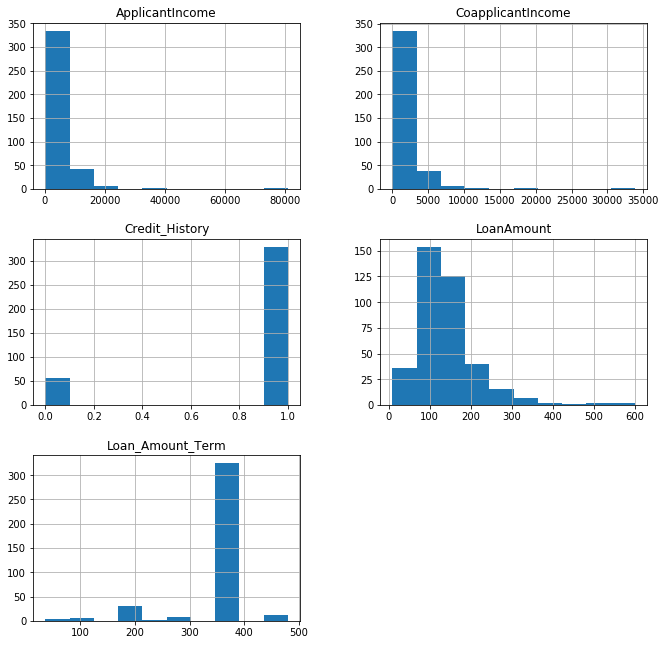

In [140]:
X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BF0DFB9B0>,
      dtype=object)

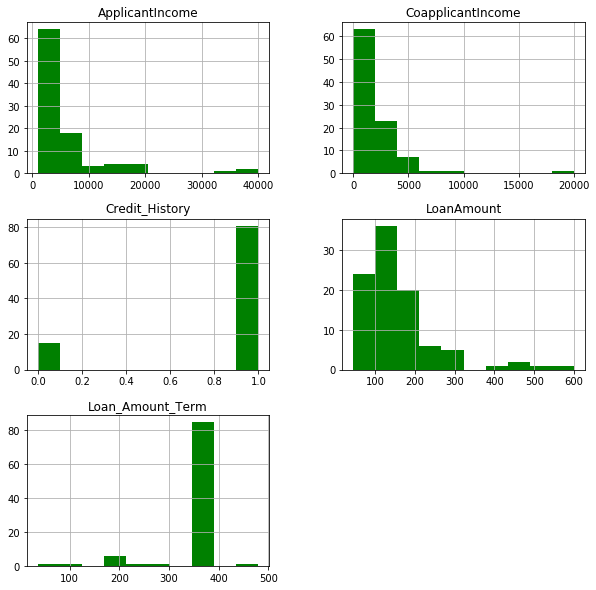

In [141]:
X_test[X_test.dtypes[(X_test.dtypes=='float64')|(X_test.dtypes=='int64')].index.values].hist(figsize=(10,10),color='green')

In [142]:
X_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Text(0.5, 1.0, 'Income vs loan amount based on gender')

<Figure size 576x864 with 0 Axes>

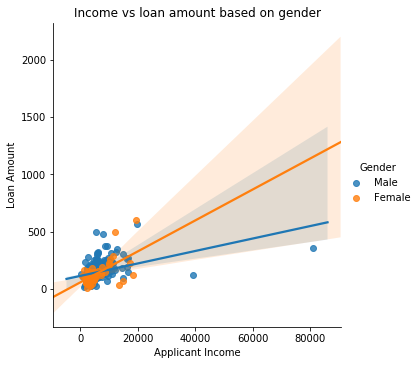

In [143]:
#What is the distribution of income VS the amount of loan applied for?
plt.figure(figsize=(8,12))
sns.lmplot(x='ApplicantIncome',y='LoanAmount',data=X_train, hue='Gender')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Income vs loan amount based on gender')

Text(0.5, 1.0, 'Loan Amount vs loan repayment period based on gender')

<Figure size 576x864 with 0 Axes>

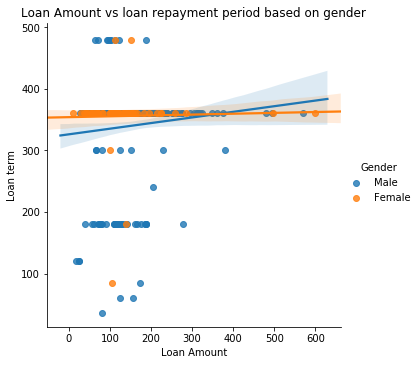

In [144]:
plt.figure(figsize=(8,12))
sns.lmplot(x='LoanAmount',y='Loan_Amount_Term',data=X_train, hue='Gender')
plt.xlabel('Loan Amount')
plt.ylabel('Loan term')
plt.title('Loan Amount vs loan repayment period based on gender')

<BarContainer object of 2 artists>

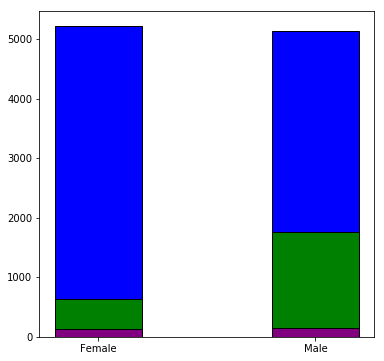

In [145]:
plt.figure(figsize=(6,6))
gender_dist=X_train.groupby('Gender').mean()
#gender_dist.plot(kind='bar')
plt.bar(gender_dist.index,height=gender_dist['ApplicantIncome'],width=0.4,color='blue',edgecolor='black')
plt.bar(gender_dist.index,height=gender_dist['CoapplicantIncome'],width=0.4,color='green',edgecolor='black')
plt.bar(gender_dist.index,height=gender_dist['LoanAmount'],width=0.4,color='purple',edgecolor='black')

<Figure size 432x432 with 0 Axes>

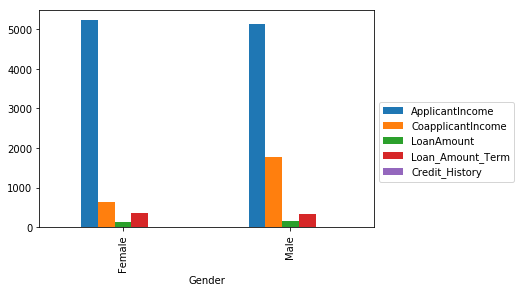

In [146]:
plt.figure(figsize=(6,6))
gender_dist=X_train.groupby('Gender').mean()
gender_dist.plot(kind='bar')
plt.legend(loc='center center',bbox_to_anchor=(1.0, 0.6))

In [147]:
plt.figure(figsize=(6,6))
gender_dist=X_train.groupby('Gender').mean()
#gender_dist.plot(kind='bar')
#plt.legend(loc='center center',bbox_to_anchor=(1.0, 0.6))
#Width
barWidth=0.4
#Choose the heights
bar1=gender_dist['ApplicantIncome']
bar2=gender_dist['CoapplicantIncome']
bar3=gender_dist['LoanAmount']

# The x position of bars
r1 = gender_dist.index
r2 = [x + barWidth for x in r1]
r3=[x + barWidth for x in r2]

plt.bar(r1,bar1,barWidth,color='blue',edgecolor='black')
plt.bar(r2,bar2,barWidth,color='green',edgecolor='black')
plt.bar(r3,bar3,barWidth,color='purple',edgecolor='black')
#Plot Layout
plt.xticks([r + barWidth for r in range(len(bar1))], ['Female','Male'])
#plt.xticks(stacked=False)
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()

TypeError: can only concatenate str (not "float") to str

<Figure size 432x432 with 0 Axes>

In [148]:
X_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

## Encoding

In [149]:
#Using Onehot encoding scheme
X_train=pd.get_dummies(X_train,columns=['Gender','Married','Education','Self_Employed','Property_Area'])

In [150]:
X_test=pd.get_dummies(X_test,columns=['Gender','Married','Education','Self_Employed','Property_Area'])

In [151]:
X_train=X_train.drop('Loan_ID',axis=1)

In [152]:
X_test=X_test.drop('Loan_ID',axis=1)

In [153]:
X_test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,3400,0,95,360,1,1,0,1,0,0,1,1,0,1,0,0
1,1,14583,0,436,360,1,0,1,0,1,1,0,1,0,0,1,0
2,0,2500,3796,120,360,1,0,1,0,1,1,0,1,0,0,0,1
3,2,3988,0,50,240,1,0,1,0,1,1,0,1,0,0,0,1
4,0,3859,0,96,360,1,0,1,0,1,1,0,1,0,0,1,0


## Scaling

In [154]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Modelling

In [157]:
knn=KNeighborsClassifier()
lr=LogisticRegression()
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()

### KNN

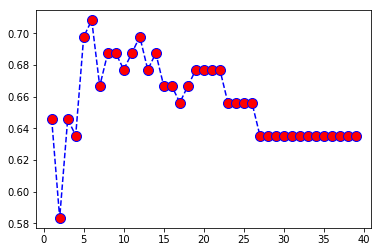

In [164]:
best_k=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    acc=accuracy_score(Y_test,pred_i)
    best_k.append(acc)
    
plt.plot(range(1,40), best_k,ls='--',color='blue',marker='o',markerfacecolor='red',markersize=10)

In [174]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)

### Linear regression

In [175]:
lr.fit(X_train,Y_train)
pred_lr=lr.predict(X_test)

### Random Forest

In [176]:
rf.fit(X_train,Y_train)
pred_rf=rf.predict(X_test)

### Gradient Boost

In [177]:
gb.fit(X_train,Y_train)
pred_gb=gb.predict(X_test)

## Accuracy

In [179]:
print('knn accuracy:',accuracy_score(Y_test,pred_knn))
print('Logistic Regression accuracy:',accuracy_score(Y_test,pred_lr))
print('Random forest curacy:',accuracy_score(Y_test,pred_rf))
print('Gradient Boost accuracy:',accuracy_score(Y_test,pred_gb))

knn accuracy: 0.6979166666666666
Logistic Regression accuracy: 0.75
Random forest curacy: 0.6770833333333334
Gradient Boost accuracy: 0.7291666666666666


## ERROR

In [181]:
print('KNN Meanabsolute error',metrics.mean_absolute_error(Y_test,pred_knn))
print('LR Meanabsolute error',metrics.mean_absolute_error(Y_test,pred_lr))
print('RF Meanabsolute error',metrics.mean_absolute_error(Y_test,pred_rf))
print('GB Meanabsolute error',metrics.mean_absolute_error(Y_test,pred_lgb))

ValueError: could not convert string to float: 'N'